In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("/content/1730285881-Airbnb_Open_Data.csv",low_memory=False)

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,7.882924e+10,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,8.509833e+10,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,9.203760e+10,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39326 entries, 0 to 39325
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39326 non-null  int64  
 1   NAME                            39195 non-null  object 
 2   host id                         39325 non-null  float64
 3   host_identity_verified          39167 non-null  object 
 4   host name                       39092 non-null  object 
 5   neighbourhood group             39298 non-null  object 
 6   neighbourhood                   39309 non-null  object 
 7   lat                             39317 non-null  float64
 8   long                            39317 non-null  float64
 9   country                         39238 non-null  object 
 10  country code                    39246 non-null  object 
 11  instant_bookable                39246 non-null  object 
 12  cancellation_policy             

In [5]:
df.duplicated().value_counts()

,count
False,39326


DATA WRANGLING

Neighbourhood group was 'Brookln' instead of 'Brooklyn'

In [6]:
df[df['neighbourhood group']== 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",2.680241e+10,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,24-06-2019,1.34,4.0,3.0,47.0,NaN,NaN


In [32]:
df.loc[df['neighbourhood group']== 'brookln','neighbourhood'] = 'Brooklyn'

Drop house_rules and license columns with insufficient data

In [8]:
df.drop(['house_rules','license'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39326 entries, 0 to 39325
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39326 non-null  int64  
 1   NAME                            39195 non-null  object 
 2   host id                         39325 non-null  float64
 3   host_identity_verified          39167 non-null  object 
 4   host name                       39092 non-null  object 
 5   neighbourhood group             39298 non-null  object 
 6   neighbourhood                   39309 non-null  object 
 7   lat                             39317 non-null  float64
 8   long                            39317 non-null  float64
 9   country                         39238 non-null  object 
 10  country code                    39246 non-null  object 
 11  instant_bookable                39246 non-null  object 
 12  cancellation_policy             

Remove all dollar signs in the price and service fee columns

In [11]:
df['price']=df['price'].str.replace('$',' ',regex=False)
df['service fee']=df['service fee'].str.replace('$',' ',regex=False)

Remove all commas in the price and service fee columns

In [12]:
df['price']=df['price'].str.replace(',',' ',regex=False)
df['service fee']=df['service fee'].str.replace(',',' ',regex=False)

In [13]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966,193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142,28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,7.882924e+10,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620,124,3.0,0.0,NaN,NaN,5.0,1.0,352.0
3,1002755,NaN,8.509833e+10,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,2005.0,368,74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,9.203760e+10,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204,41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0


Rename price and service fee columns to include dollar sign

In [14]:
df.rename(columns={'price':'price_$','service fee':'service_$'},inplace=True)

Drop all records with missing values

In [15]:
df.dropna(inplace=True)

Change all mismatch Datatypes to appropriate Datatypes

In [21]:
df['id']=df['id'].astype(str)
df['host id']=df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'], format="%d-%m-%Y", errors="coerce")
df['Construction year']=df['Construction year'].astype(int)

In [19]:
df['price_$'] = df['price_$'].astype(str).str.replace(" ", "").astype(float)
df['service_$'] = df['service_$'].astype(str).str.replace(" ", "").astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31635 entries, 0 to 39323
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              31635 non-null  object        
 1   NAME                            31635 non-null  object        
 2   host id                         31635 non-null  object        
 3   host_identity_verified          31635 non-null  object        
 4   host name                       31635 non-null  object        
 5   neighbourhood group             31635 non-null  object        
 6   neighbourhood                   31635 non-null  object        
 7   lat                             31635 non-null  float64       
 8   long                            31635 non-null  float64       
 9   country                         31635 non-null  object        
 10  country code                    31635 non-null  object        
 11  instant

Get rid of outliers in the 'availability 365' column data

In [23]:
df=df.drop(df[df['availability 365']>500].index)

EXPLORATORY DATA ANALYSIS

Summary Statistics

In [24]:
df.describe()

,lat,long,Construction year,price_$,service_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,31635.000000,31635.000000,31635.000000,31635.000000,31635.000000,31635.000000,31635.000000,31635,31635.000000,31635.000000,31635.000000,31635.000000
mean,40.727886,-73.951714,2012.486423,624.537980,124.909847,6.274411,32.605595,2018-08-20 20:20:00.341394176,1.183980,3.189347,3.615458,147.856899
min,40.508680,-74.239860,2003.000000,50.000000,10.000000,-12.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.688155,-73.981970,2008.000000,336.000000,67.000000,2.000000,3.000000,2018-02-18 00:00:00,0.160000,2.000000,1.000000,9.000000
50%,40.721330,-73.955020,2012.000000,621.000000,124.000000,3.000000,12.000000,2019-04-16 00:00:00,0.520000,3.000000,1.000000,118.000000
75%,40.763105,-73.936485,2017.000000,914.000000,183.000000,4.000000,40.000000,2019-06-21 00:00:00,1.720000,4.000000,2.000000,269.000000
max,40.908040,-73.712990,2022.000000,1200.000000,240.000000,1250.000000,629.000000,2022-05-21 00:00:00,20.940000,5.000000,327.000000,426.000000
std,0.054947,0.045200,5.756186,333.228653,66.647785,18.984348,49.984331,NaN,1.520148,1.336383,12.836297,135.247436


What are the different property types in Dataset

In [26]:
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,16595
Private room,14423
Shared room,617


Room type count plotted on bar chart

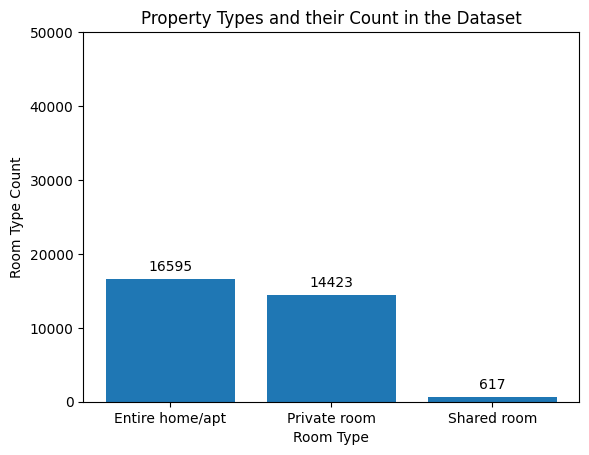

In [27]:
room_type_bar=plt.bar(property_types.index,property_types.loc[:,'count']);
plt.bar_label(room_type_bar,labels=property_types.loc[:,'count'],padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their Count in the Dataset');

NOTE: Majority of properties are entire homes/apartments, followed by Private rooms and Shared room

Which neighbourhood group has highest number of listing ?

In [33]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,13771
Manhattan,13420
Queens,3549
Bronx,656
Staten Island,238
brookln,1


In [29]:
df.loc[df['neighbourhood group']== 'brookln','neighbourhood'] = 'Brooklyn'

,neighbourhood
13,False


In [34]:
df[df['neighbourhood group']== 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424.0,verified,Darcy,brookln,Brooklyn,40.66829,-73.98779,United States,...,2010,580.0,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0


In [35]:
df['neighbourhood group'].unique()


array(['Brooklyn', 'Manhattan', 'brookln', 'Queens', 'Bronx',
       'Staten Island'], dtype=object)

In [36]:
df['neighbourhood group'] = df['neighbourhood group'].str.strip().str.lower()


In [37]:
df['neighbourhood group'] = df['neighbourhood group'].replace({
    'brookln': 'brooklyn',
})


In [38]:
df['neighbourhood group'] = df['neighbourhood group'].str.title()


In [39]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,13772
Manhattan,13420
Queens,3549
Bronx,656
Staten Island,238


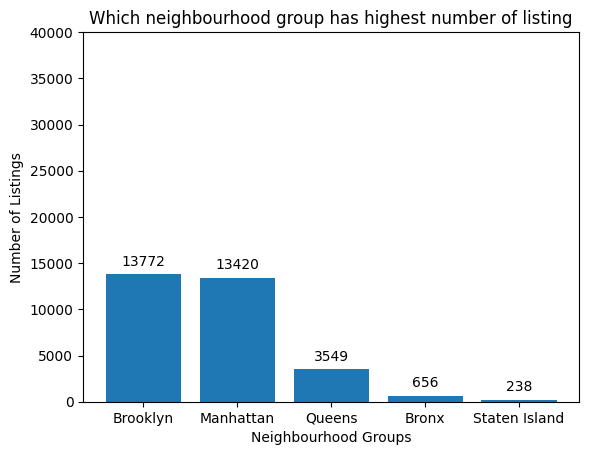

In [41]:
hood_group_bar=plt.bar(hood_group.index,hood_group.loc[:,'count']);
plt.bar_label(hood_group_bar,labels=hood_group.loc[:,'count'],padding=4);
plt.ylim([0,40000]);
plt.xlabel('Neighbourhood Groups');
plt.ylabel('Number of Listings');
plt.title('Which neighbourhood group has highest number of listing');

NOTE: Brooklyn has the most listings, slightly more than Manhattan, while Staten Island has very few.

Which neighbourhood group has highest average prices for Airbnb Listings ?

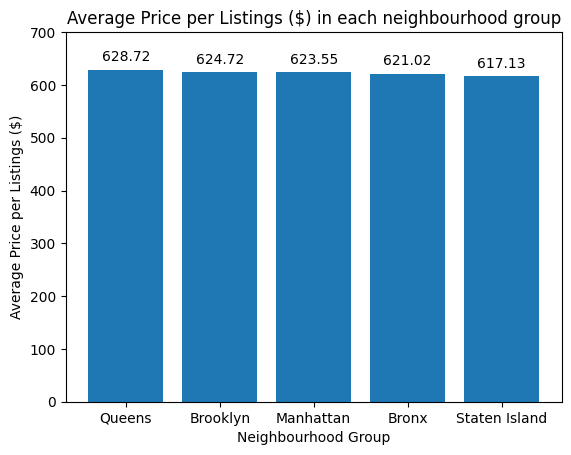

In [42]:
avg_price=df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,'price_$']);
plt.bar_label(avg_price_bar,labels=round(avg_price.loc[:,'price_$'],2),label_type='edge',padding=4);
plt.ylim([0,700]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Price per Listings ($)');
plt.title('Average Price per Listings ($) in each neighbourhood group');

NOTE: Average prices across groups are fairly close, but Queens has the highest average.

Is their any relationship between the construction year of property and price ?

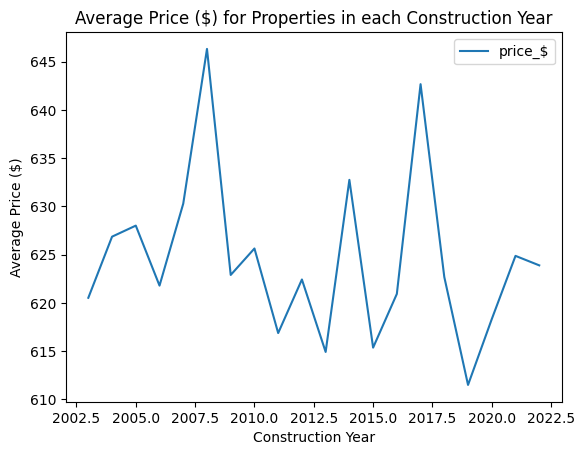

In [43]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');

NOTE: There’s no clear upward or downward trend, but noticeable volatility.

Who are the Top 10 hosts by calculated host listing count ?

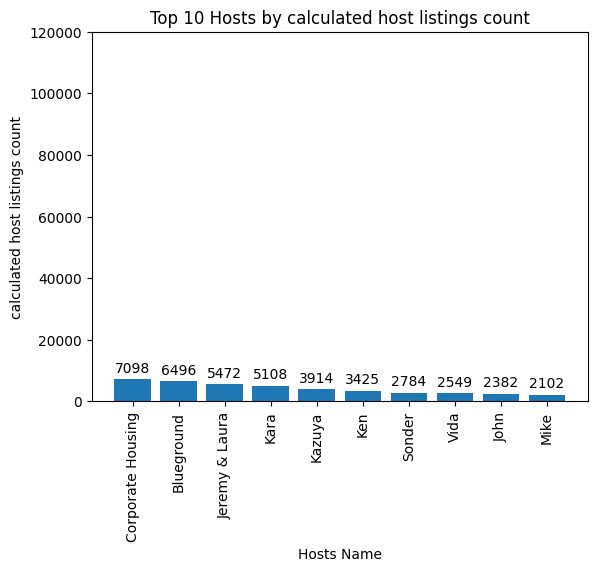

In [56]:
hosts=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar=plt.bar(hosts.index,hosts.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar,label=hosts.loc[:,'calculated host listings count'],label_type='edge',padding=3);
plt.ylim([0,120000]);
plt.xticks(rotation=90);
plt.xlabel('Hosts Name');
plt.ylabel('calculated host listings count');
plt.title('Top 10 Hosts by calculated host listings count');

NOTE: Hosting is dominated by a few big players, with Corporate Housing and Blueground leading by a wide margin.

Are hosts with verified identities more likely to receive positive reviews ?

In [57]:
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.195424
unconfirmed,3.183333


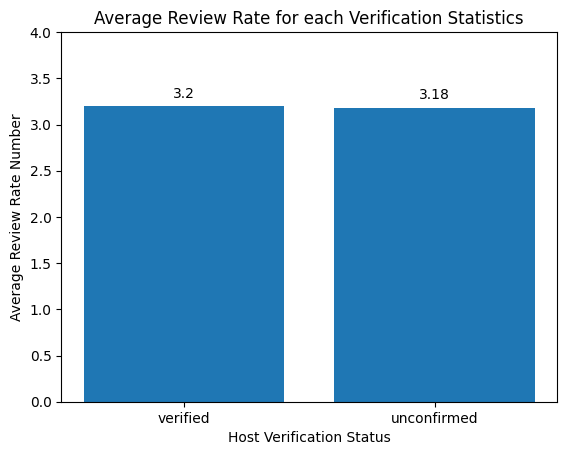

In [60]:
review_bar=plt.bar(review.index,review.loc[:,'review rate number']);
plt.bar_label(review_bar,labels=round(review.loc[:,'review rate number'],2),padding=4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Statistics');

NOTE: The difference is very small, indicating a marginal difference in their review rates,with unconfirmed hosts having a slightly higher rate.This suggests that verified hosts are not necessarily more likely to receive positive reviews compared to unconfirmed hosts.

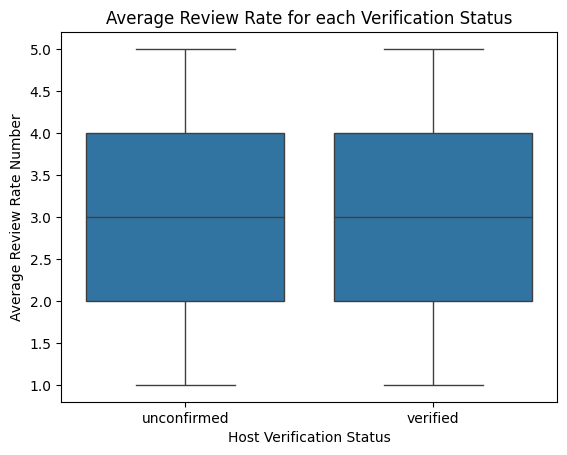

In [62]:
base_color=sns.color_palette()[0]
sns.boxplot(data=df,x='host_identity_verified',y='review rate number',color=base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Status');

Is their a correlation between the price of a listing and its service fee ?

In [64]:
df['price_$'].corr(df['service_$'])

np.float64(0.9999909953829348)

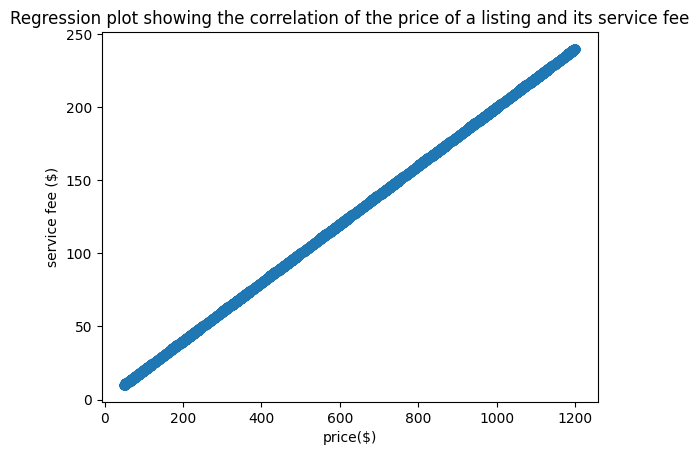

In [65]:
sns.regplot(df,x='price_$',y='service_$');
plt.xlabel('price($)');
plt.ylabel('service fee ($)');
plt.title('Regression plot showing the correlation of the price of a listing and its service fee');

NOTE: The pearson correlation coefficient between the price and service fee is indicating a highly positive correlation between the two variables. On regression plot, each point forms a rising diagonal line towards the right,signifying that as the price of a property increases,then service fee increases.

What is the average review rate number(e.g., stars) for listings, and does it vary based on the neighbourhood group and room type ?

In [66]:
ARRN=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.299559
                    Private room               3.244444
                    Shared room                3.083333
Brooklyn            Entire home/apt            3.150471
                    Private room               3.214296
                    Shared room                3.229730
Manhattan           Entire home/apt            3.162977
                    Private room               3.203410
                    Shared room                3.258555
Queens              Entire home/apt            3.210022
                    Private room               3.227599
                    Shared room                3.304762
Staten Island       Entire home/apt            3.306306
                    Private room               3.451613
                    Shared room                4.333333

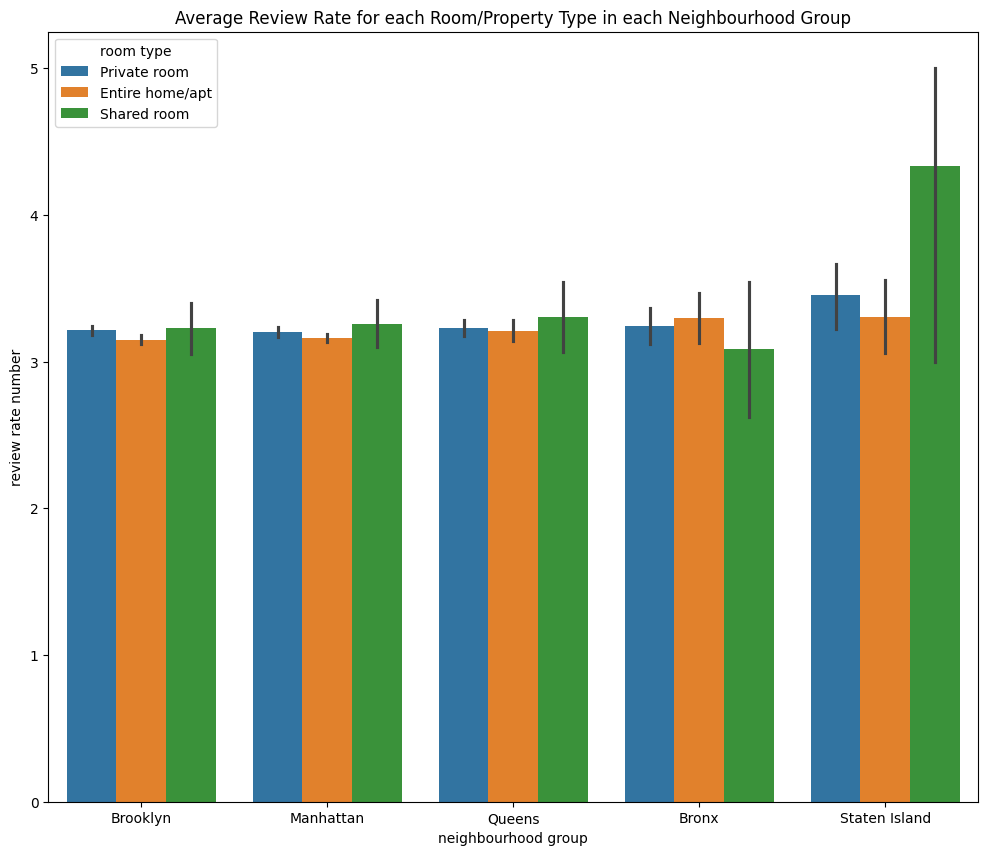

In [67]:
plt.figure(figsize=[12,10]);
sns.barplot(data=df,x='neighbourhood group',y='review rate number',hue='room type');
plt.xlabel('neighbourhood group');
plt.ylabel('review rate number');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group');

NOTE: Shared room has the highest review rate compared to all other property types within four neighbourhoods groups where their are located: Brooklyn,Manhattan,Queens and Staten Island

Are hosts with higher calculated host listings count more likely to maintain higher availability throughout the year ?

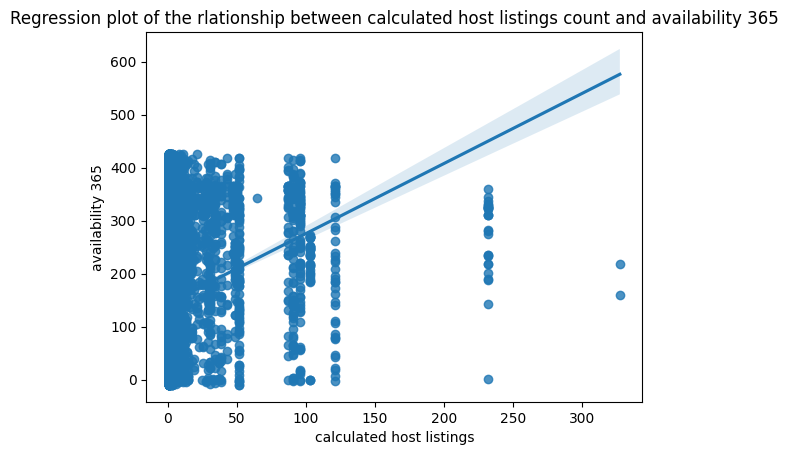

In [68]:
sns.regplot(df,x='calculated host listings count',y= 'availability 365');
plt.xlabel('calculated host listings');
plt.ylabel('availability 365');
plt.title('Regression plot of the rlationship between calculated host listings count and availability 365');

In [69]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.12566651520799899)

The pearson correlation coefficient for the association between calculated host listings and availability 365 is 0.125, indicating a weak positive correlation between the two variables

CONCLUSION

In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term rental market. Through data wrangling, Exploratory Data Analysis (EDA), and interpretation of summary statistics, several valuable insights have been uncovered regarding listing distribution, pricing patterns, host dynamics, and review analysis.

The findings reveal that entire homes and apartments dominate the market, with Brooklyn and Manhattan being the most popular neighbourhood groups for listings, while Queens shows relatively higher pricing potential. Price levels remain fairly stable across neighbourhoods and construction years, with service fees scaling directly with listing prices. Additionally, the analysis highlights the dominance of professional hosts managing multiple properties, ensuring higher availability compared to smaller individual hosts. Interestingly, host verification status has little impact on average review ratings, suggesting that guest satisfaction is more strongly influenced by service quality and property experience.

Overall, this study provides meaningful insights into how location, property type, and host characteristics shape the Airbnb market in New York City. These findings can be valuable for hosts aiming to optimize their listings, for guests seeking the best value, and for policymakers looking to better understand the dynamics of short-term rentals in the city.